In [1]:
import pandas as pd

import pandas_datareader as pdr
#helps in remotely accessing data from sites

import matplotlib.pyplot as plt

# Data Collection
Importing stock data from Tiingo, which is supported by pandas_datareader
stock price for aaple- AAPL

In [2]:
df= pdr.get_data_tiingo('TSLA', api_key="77f2b1c33ecff205fd3489be2a3b5d3ad9595913"
)

In [3]:
df.to_csv('TSLA.csv')

In [4]:
df= pd.read_csv('TSLA.csv')
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-02-28 00:00:00+00:00,249.99,251.00,243.90,244.19,6078145,49.998,50.200,48.780,48.838,30390725,0.0,1.0
1,TSLA,2017-03-01 00:00:00+00:00,250.02,254.85,249.11,254.18,4809488,50.004,50.970,49.822,50.836,24047440,0.0,1.0
2,TSLA,2017-03-02 00:00:00+00:00,250.48,253.28,248.27,249.71,3351833,50.096,50.656,49.654,49.942,16759165,0.0,1.0
3,TSLA,2017-03-03 00:00:00+00:00,251.57,251.90,249.00,250.74,2929234,50.314,50.380,49.800,50.148,14646170,0.0,1.0
4,TSLA,2017-03-06 00:00:00+00:00,251.21,251.70,247.51,247.91,3355500,50.242,50.340,49.502,49.582,16777500,0.0,1.0


In [5]:
df1= df.reset_index()['close']


In [6]:
df1.head()

0    249.99
1    250.02
2    250.48
3    251.57
4    251.21
Name: close, dtype: float64

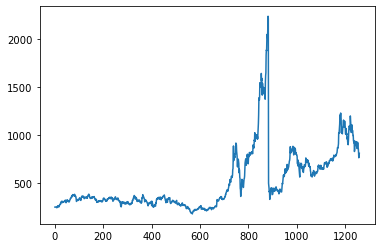

In [7]:
plt.plot(df1)

LSTM is sensitive to scale of data, we are using MinMax scalar

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler(feature_range=(0,1))
df1= scalar.fit_transform(np.array(df1).reshape(-1,1))

print(df1)
df1.shape


[[0.03447941]
 [0.03449398]
 [0.0347173 ]
 ...
 [0.2840449 ]
 [0.3018769 ]
 [0.30629485]]


(1259, 1)

# Training and Testing
first split the dataset

In [10]:
training_size= int(len(df1)*0.65)
test_size= len(df1)- training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [11]:
training_size, test_size

(818, 441)

In [12]:
len(train_data), len(test_data)

(818, 441)

Assigning time-steps so as to know how many past days dta to be considered for presiction


In [13]:
#Convert an array of values into dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)- time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4

time_step =100
x_train, y_train= create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [15]:
x_train.shape, y_train.shape

((717, 100), (717,))

In [16]:
x_test.shape, y_test.shape

((340, 100), (340,))

reshaping input to be [sample, timesteps, features] which wil be used as LSTM

In [17]:
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential as sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Creating a stacked LSTM model

In [19]:
model= sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True,))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= 'adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0050 - val_loss: 0.0203
Epoch 2/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 3/100
12/12 [==============================] - 1s 105ms/step - loss: 9.0575e-04 - val_loss: 0.0017
Epoch 4/100
12/12 [==============================] - 1s 107ms/step - loss: 7.7107e-04 - val_loss: 0.0021
Epoch 5/100
12/12 [==============================] - 1s 106ms/step - loss: 6.7565e-04 - val_loss: 0.0013
Epoch 6/100
12/12 [==============================] - 1s 108ms/step - loss: 5.8523e-04 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 1s 109ms/step - loss: 5.2697e-04 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 1s 118ms/step - loss: 4.4707e-04 - val_loss: 0.0011
Epoch 9/100
12/12 [==============================] - 1s 118ms/step - loss: 3.9505e-04 - val_loss: 0.0010
Epoch 10/100
12/12 [==============================] - 1s 116ms/

# Prediction model

In [ ]:
#prediction and checking performance metrices

train_predict= model.predict(x_train)
test_predict= model.predict(x_test)

In [ ]:
#transform back to original form

train_predict= scalar.inverse_transform(train_predict)
test_predict= scalar.inverse_transform(test_predict)

In [ ]:
#calculating RSME(root squared mean) performance metrics

import math
from sklearn.metrics import mean_squared_error


In [ ]:
#train data RMSE

math.sqrt(mean_squared_error(y_train, train_predict))

In [ ]:
#test data RMSE


math.sqrt(mean_squared_error(y_test, test_predict))

# Plotting

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)

In [ ]:
plt.plot(day_new,scalar.inverse_transform(df1[1159:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

In [ ]:
#combining df1 to the lst output
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scalar.inverse_transform(df3).tolist()
plt.plot(df3)
